In [43]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F

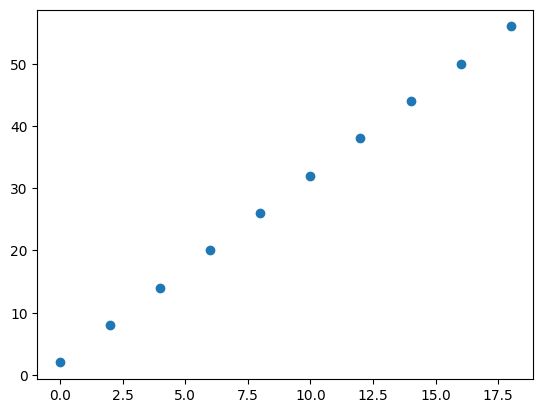

In [44]:
x = np.arange(0,20,2)
y = 2 + 3*x
plt.scatter(x, y)
plt.show()

In [45]:
model = LinearRegression()
x = x.reshape(-1,1)
y = y.reshape(-1,1)
result = model.fit(x, y)
print(result.coef_)
print(result.intercept_)

[[3.]]
[2.]


In [46]:
torch.seed()

class SGDRegression(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc = nn.Linear(1,1)

    def forward(self, x):
        y = self.fc(x)
        return y

model = SGDRegression()
loss_fn = torch.nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
EPOCHS = 5000

X_train = torch.tensor(x, dtype=torch.float32)
y_train = torch.tensor(y, dtype=torch.float32)


In [23]:
for name, param in model.named_parameters():
    print(f"{name} -- {param}")

fc.weight -- Parameter containing:
tensor([[ 0.6638, -0.1180]], requires_grad=True)
fc.bias -- Parameter containing:
tensor([-0.4611], requires_grad=True)


In [47]:
losses = []

for e in range(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    losses.append(loss.item())
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    

In [48]:
for name, param in model.named_parameters():
    print(name, param)

fc.weight Parameter containing:
tensor([[nan]], requires_grad=True)
fc.bias Parameter containing:
tensor([nan], requires_grad=True)
